# Functional API

- 지금까지 사용해왔던 <b>Sequential API 방식은 입력부터 출력까지 일직선으로 연결</b>되어 있어 직관적이고 편리한 장점이 있으나, 여러개의 층을 공유하거나 다양한 종류의 입력과 출력을 사용해서 복잡한 모델을 만드는 일에는, 일직선 구조로 인해 한계가 있음.
  
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/24-1.png" style="max-width: 60%; height: auto;"> <p>


# Functional API 모델 구축 및 학습 프로세스
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/24-2.png" style="max-width: 60%; height: auto;"> <p>

1. 입력 데이터 shape을 <code>tf.keras.layers.input()</code> 함수의 인자로 넣어주어 입력층을 정의
2. <b>이전층 출력값을 다음층 함수의 입력값으로 사용</b>한 후,
3. <code>tf.keras,models.Model()</code> 함수에 입력과 출력을 넣어주어 모델 구출을 완성
   
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/24-3.png" style="max-width: 60%; height: auto;"> <p>

# Tensorflow version 2.12.0 사용

# Sequential API 모델 예시

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()
     
tf.__version__

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 1,058
Trainable params: 1,058
Non-trainable params: 0
_________________________________________________________________


'2.12.0'

# Functional API 모델 예시

In [3]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_ = Input(shape=(4,))

x = Dense(8, activation='relu')(input_)
x = Dense(16, activation='relu')(x)
x = Dense(32, activation='relu')(x)

output_ = Dense(10, activation='softmax')(x)

model = Model(inputs=input_,  outputs=output_)

model.summary()
     

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_8 (Dense)             (None, 8)                 40        
                                                                 
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 1,058
Trainable params: 1,058
Non-trainable params: 0
_________________________________________________________________


# 다중입력에 대한 Functional API 예시

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/24-4.png" style="max-width: 60%; height: auto;"> <p>

In [4]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 입력층 1 에 대한 신경망
input_1 = Input(shape=(4,))    

hidden_1 = Dense(8, activation='relu')(input_1)
hidden_2 = Dense(16, activation='relu')(hidden_1)

output_1 = Model(inputs=input_1,  outputs=hidden_2)

# 입력층 2 에 대한 신경망
input_2 = Input(shape=(8,)) 

hidden_3 = Dense(8, activation='relu')(input_2)

output_2 = Model(inputs=input_2,  outputs=hidden_3)

# 층 연결
result = concatenate([output_1.output, output_2.output])

# 출력층 정의
output_ = Dense(10, activation='softmax')(result)

# 최종 모델 구축
model = Model(inputs=[output_1.input, output_2.input],  outputs=output_)

model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 8)            40          ['input_2[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 16)           144         ['dense_12[0][0]']               
                                                                                            

# Functional API CNN Example - MNIST datasets

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/24-5.png" style="max-width: 60%; height: auto;"> <p>

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [6]:
input_ = Input(shape=(28,28,1))

x = Conv2D(32, 3, activation='relu')(input_)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output_ = Dense(10, activation='softmax')(x)

cnn = Model(inputs=input_,  outputs=output_)

In [7]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                           

In [8]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test),verbose=1)

Epoch 1/30
469/469 [==============================] - 38s 79ms/step - loss: 0.2552 - accuracy: 0.9227 - val_loss: 0.0560 - val_accuracy: 0.9821
Epoch 2/30
469/469 [==============================] - 40s 85ms/step - loss: 0.0910 - accuracy: 0.9725 - val_loss: 0.0389 - val_accuracy: 0.9861
Epoch 3/30
469/469 [==============================] - 37s 79ms/step - loss: 0.0661 - accuracy: 0.9806 - val_loss: 0.0334 - val_accuracy: 0.9888
Epoch 4/30
469/469 [==============================] - 39s 83ms/step - loss: 0.0550 - accuracy: 0.9832 - val_loss: 0.0309 - val_accuracy: 0.9897
Epoch 5/30
469/469 [==============================] - 37s 80ms/step - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0282 - val_accuracy: 0.9913
Epoch 6/30
469/469 [==============================] - 37s 79ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.0311 - val_accuracy: 0.9904
Epoch 7/30
469/469 [==============================] - 37s 80ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0283 - val_accuracy:

In [9]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0342 - accuracy: 0.9923


[0.034225646406412125, 0.9922999739646912]

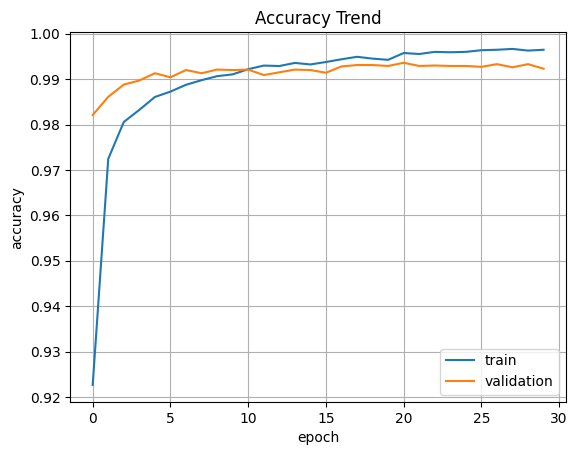

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

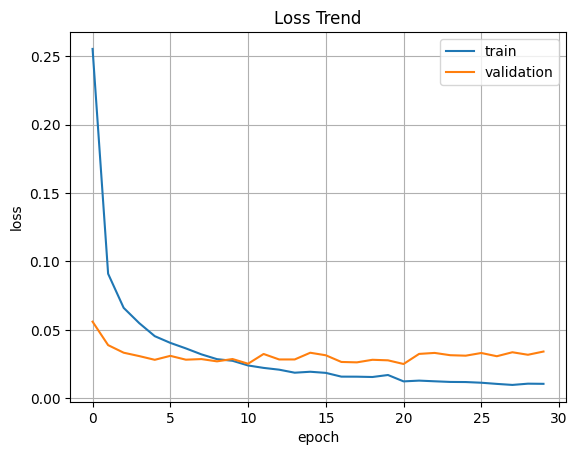

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

# Functional API CNN Example - MNIST datasets

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/24-6.png" style="max-width: 60%; height: auto;"> <p>

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, concatenate
from tensorflow.keras.models import Model

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train1=x_train.reshape(-1, 28, 28, 1)
x_train2=x_train.reshape(-1, 14, 56, 1)
x_test1=x_test.reshape(-1, 28, 28, 1)
x_test2=x_test.reshape(-1, 14, 56, 1)

print(x_train1.shape, x_train2.shape)
print(y_train.shape, y_test.shape)

x_train1 = x_train1 / 255.0
x_train2 = x_train2 / 255.0
x_test1 = x_test1 / 255.0
x_test2 = x_test2 / 255.0

(60000, 28, 28, 1) (60000, 14, 56, 1)
(60000,) (10000,)


In [4]:
# 입력1
input_1 = Input(shape=(28,28,1))

x1 = Conv2D(32, 3, activation='relu')(input_1)
x1 = Conv2D(64, 3, activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = Dropout(0.25)(x1)

x1 = Flatten()(x1)

x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.5)(x1)

output_1 = Model(inputs=input_1,  outputs=x1)

# 입력2
input_2 = Input(shape=(14,56,1))

x2 = Conv2D(32, 3, activation='relu')(input_2)
x2 = Conv2D(64, 3, activation='relu')(x2)
x2 = MaxPool2D(pool_size=(2,2))(x2)
x2 = Dropout(0.25)(x2)

x2 = Flatten()(x2)

x2 = Dense(128, activation='relu')(x2)
x2 = Dropout(0.5)(x2)

output_2 = Model(inputs=input_2,  outputs=x2)

# 층 연결
result = concatenate([output_1.output, output_2.output])

# 출력층 정의
output_ = Dense(10, activation='softmax')(result)

# 최종 모델 구축
cnn = Model(inputs=[output_1.input, output_2.input],  outputs=output_)


In [5]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 14, 56, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 12, 54, 32)   320         ['input_2[0][0]']                
                                                                                            

In [6]:
hist = cnn.fit((x_train1, x_train2), y_train, batch_size=128, 
               epochs=30, validation_data=((x_test1, x_test2), y_test),verbose=1)

Epoch 1/30
469/469 [==============================] - 63s 132ms/step - loss: 0.1950 - accuracy: 0.9406 - val_loss: 0.0480 - val_accuracy: 0.9842
Epoch 2/30
469/469 [==============================] - 62s 132ms/step - loss: 0.0635 - accuracy: 0.9803 - val_loss: 0.0313 - val_accuracy: 0.9898
Epoch 3/30
469/469 [==============================] - 62s 132ms/step - loss: 0.0469 - accuracy: 0.9861 - val_loss: 0.0257 - val_accuracy: 0.9910
Epoch 4/30
469/469 [==============================] - 63s 134ms/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 0.0245 - val_accuracy: 0.9914
Epoch 5/30
469/469 [==============================] - 62s 132ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0251 - val_accuracy: 0.9912
Epoch 6/30
469/469 [==============================] - 62s 133ms/step - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.0208 - val_accuracy: 0.9934
Epoch 7/30
469/469 [==============================] - 62s 131ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0268 - val_ac

In [9]:
cnn.evaluate((x_test1, x_test2), y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0262 - accuracy: 0.9950


[0.02621443197131157, 0.9950000047683716]

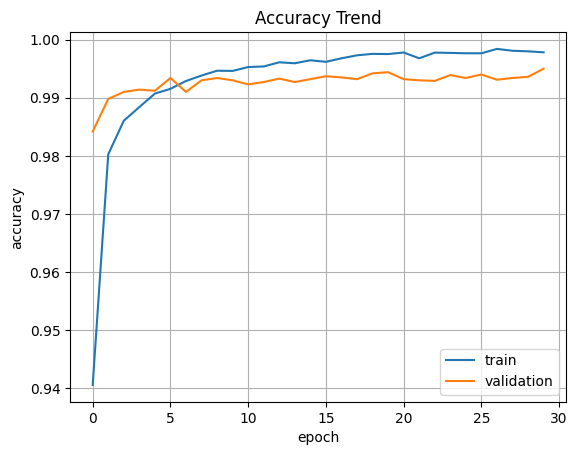

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

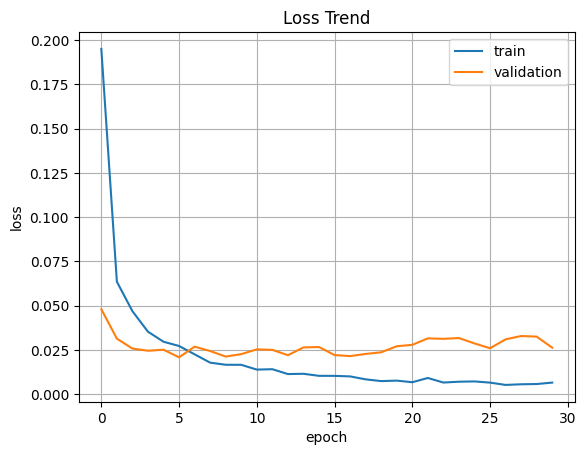

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()